In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pecanpy

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [3]:
pd.__version__

'0.22.0'

In [4]:
# define KAPSARC user credentials
USER_NAME = ???
PASSWORD = ???

# create the engine that connects to the database...
local_engine = pecanpy.create_local_engine(USER_NAME, PASSWORD)

In [5]:
with local_engine.connect() as con:
    metadata_df = pecanpy.read_metadata_table(con, schema="public")

In [6]:
metadata_df.head()

,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,city,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
dataid,,,,,,,,,,,,,,,,,,,,,
5545,True,Single-Family Home,False,True,True,False,False,CCET - Control,None,Austin,...,True,False,False,False,False,False,False,False,False,False
9160,True,Single-Family Home,False,True,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
2199,True,Single-Family Home,False,False,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
5026,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,True,False,False,False,False,False,False,False,False,False
7335,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,False,False,False,False,False,False,False,False,False,False


In [7]:
time = datetime.datetime.now()
seed = time.hour * 10000 + time.minute * 100 + time.second
prng = np.random.RandomState(seed)
with_egauge_data = metadata_df[metadata_df.egauge_min_time.notnull()]
random_household = with_egauge_data.sample(n=1, random_state=prng)

In [8]:
# how much available data possibly exists?
start_time = random_household.iloc[0].egauge_min_time
end_time = random_household.iloc[0].egauge_max_time
time_delta = end_time - start_time

In [9]:
time_delta

Timedelta('334 days 23:59:00')

In [10]:
with local_engine.connect() as local_con:

    # extract the required parameters
    dataid = random_household.iloc[0].name
    start_time = random_household.iloc[0].egauge_min_time
    end_time = random_household.iloc[0].egauge_max_time

    # pull down data for different aggregations
    minutes_df = pecanpy.read_electricity_egauge_minutes_query(local_con, "research", "all", dataid, start_time, end_time)
    qtr_hour_df = pecanpy.read_electricity_egauge_15min_query(local_con, "research", "all", dataid, start_time, end_time)
    hours_df = pecanpy.read_electricity_egauge_hours_query(local_con, "research", "all", dataid, start_time, end_time)

## Minutes data

In [11]:
minutes_df.shape

(482384, 68)

In [12]:
minutes_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2013-08-29 19:00:00-05:00,280,0.420,0.000,None,None,None,None,None,None,None,...,0.161,None,None,None,None,None,None,0.0,None,None
2013-08-29 19:01:00-05:00,280,0.489,0.058,None,None,None,None,None,None,None,...,0.161,None,None,None,None,None,None,0.0,None,None
2013-08-29 19:02:00-05:00,280,4.176,3.234,None,None,None,None,None,None,None,...,0.096,None,None,None,None,None,None,0.0,None,None
2013-08-29 19:03:00-05:00,280,4.177,3.237,None,None,None,None,None,None,None,...,0.010,None,None,None,None,None,None,0.0,None,None
2013-08-29 19:04:00-05:00,280,4.163,3.230,None,None,None,None,None,None,None,...,0.010,None,None,None,None,None,None,0.0,None,None


In [13]:
minutes_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2014-07-30 18:54:00-05:00,280,4.060,3.131,None,None,None,None,None,None,None,...,0.167,None,None,None,None,None,None,0.0,None,None
2014-07-30 18:55:00-05:00,280,3.979,3.127,None,None,None,None,None,None,None,...,0.167,None,None,None,None,None,None,0.0,None,None
2014-07-30 18:56:00-05:00,280,3.994,3.142,None,None,None,None,None,None,None,...,0.166,None,None,None,None,None,None,0.0,None,None
2014-07-30 18:57:00-05:00,280,3.978,3.126,None,None,None,None,None,None,None,...,0.166,None,None,None,None,None,None,0.0,None,None
2014-07-30 18:58:00-05:00,280,3.982,3.130,None,None,None,None,None,None,None,...,0.165,None,None,None,None,None,None,0.0,None,None


In [14]:
# if gen is not null, then household is a prosumer!
minutes_df[["grid", "use", "gen"]].head()

,grid,use,gen
localminute,,,
2013-08-29 19:00:00-05:00,0.420,0.420,None
2013-08-29 19:01:00-05:00,0.489,0.489,None
2013-08-29 19:02:00-05:00,4.176,4.176,None
2013-08-29 19:03:00-05:00,4.177,4.177,None
2013-08-29 19:04:00-05:00,4.163,4.163,None


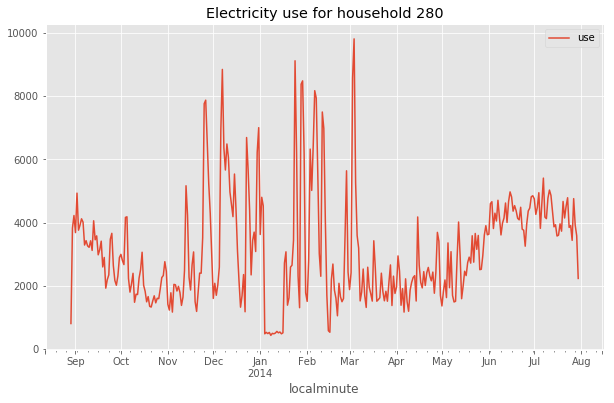

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# plot total daily electricity usage
minutes_df.use.resample("D").sum().plot(ax=ax, label="use")
ax.set_title("Electricity use for household {}".format(dataid))
ax.legend()
plt.show()

## 15-minute data

In [17]:
qtr_hour_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
local_15min,,,,,,,,,,,,,,,,,,,,,
2013-08-29 19:00:00-05:00,280,2.389067,1.631400,None,None,None,None,None,None,None,...,0.045733,None,None,None,None,None,None,0.0,None,None
2013-08-29 19:15:00-05:00,280,1.979000,1.208933,None,None,None,None,None,None,None,...,0.035600,None,None,None,None,None,None,0.0,None,None
2013-08-29 19:30:00-05:00,280,2.342667,1.477400,None,None,None,None,None,None,None,...,0.182467,None,None,None,None,None,None,0.0,None,None
2013-08-29 19:45:00-05:00,280,2.827733,1.953667,None,None,None,None,None,None,None,...,0.115200,None,None,None,None,None,None,0.0,None,None
2013-08-29 20:00:00-05:00,280,2.592467,1.918667,None,None,None,None,None,None,None,...,0.013400,None,None,None,None,None,None,0.0,None,None


In [18]:
qtr_hour_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
local_15min,,,,,,,,,,,,,,,,,,,,,
2014-07-30 16:45:00-05:00,280,4.089800,3.187333,None,None,None,None,None,None,None,...,0.144067,None,None,None,None,None,None,0.0,None,None
2014-07-30 17:00:00-05:00,280,4.038267,3.182000,None,None,None,None,None,None,None,...,0.120600,None,None,None,None,None,None,0.0,None,None
2014-07-30 17:15:00-05:00,280,3.913133,3.159867,None,None,None,None,None,None,None,...,0.013000,None,None,None,None,None,None,0.0,None,None
2014-07-30 17:30:00-05:00,280,3.250600,2.413000,None,None,None,None,None,None,None,...,0.013200,None,None,None,None,None,None,0.0,None,None
2014-07-30 17:45:00-05:00,280,3.759600,2.838533,None,None,None,None,None,None,None,...,0.161333,None,None,None,None,None,None,0.0,None,None


In [19]:
# can recover the 15-minute data ay aggregating the minutes data!
minutes_df.resample("15T").mean().tail()

,dataid,use,air1,clotheswasher1,dishwasher1,disposal1,drye1,furnace1,grid,microwave1,range1,refrigerator1,waterheater1
localminute,,,,,,,,,,,,,
2014-07-30 17:45:00-05:00,280,4.089800,3.187333,0.0,0.0,0.0,0.0,0.676467,4.089800,0.004000,0.0,0.144067,0.0
2014-07-30 18:00:00-05:00,280,4.038267,3.182000,0.0,0.0,0.0,0.0,0.681733,4.038267,0.004000,0.0,0.120600,0.0
2014-07-30 18:15:00-05:00,280,3.913133,3.159867,0.0,0.0,0.0,0.0,0.664067,3.913133,0.004000,0.0,0.013000,0.0
2014-07-30 18:30:00-05:00,280,3.250600,2.413000,0.0,0.0,0.0,0.0,0.659800,3.250600,0.003800,0.0,0.013200,0.0
2014-07-30 18:45:00-05:00,280,3.743786,2.817714,0.0,0.0,0.0,0.0,0.640500,3.743786,0.003929,0.0,0.161071,0.0


## Hours data

In [20]:
hours_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2013-08-29 19:00:00-05:00,280,2.384617,1.567850,None,None,None,None,None,None,None,...,0.094750,None,None,None,None,None,None,0.0000,None,None
2013-08-29 20:00:00-05:00,280,2.284333,1.527500,None,None,None,None,None,None,None,...,0.058433,None,None,None,None,None,None,0.0000,None,None
2013-08-29 21:00:00-05:00,280,2.104550,1.372150,None,None,None,None,None,None,None,...,0.089050,None,None,None,None,None,None,0.0000,None,None
2013-08-29 22:00:00-05:00,280,3.919167,2.737267,None,None,None,None,None,None,None,...,0.087867,None,None,None,None,None,None,0.0004,None,None
2013-08-29 23:00:00-05:00,280,3.093050,2.160267,None,None,None,None,None,None,None,...,0.090067,None,None,None,None,None,None,0.0000,None,None


In [21]:
hours_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2014-07-30 13:00:00-05:00,280,2.423033,1.590650,None,None,None,None,None,None,None,...,0.238083,None,None,None,None,None,None,0.0,None,None
2014-07-30 14:00:00-05:00,280,2.417650,1.676850,None,None,None,None,None,None,None,...,0.129150,None,None,None,None,None,None,0.0,None,None
2014-07-30 15:00:00-05:00,280,2.481133,1.736933,None,None,None,None,None,None,None,...,0.112117,None,None,None,None,None,None,0.0,None,None
2014-07-30 16:00:00-05:00,280,4.072767,3.198267,None,None,None,None,None,None,None,...,0.075400,None,None,None,None,None,None,0.0,None,None
2014-07-30 17:00:00-05:00,280,3.740400,2.898350,None,None,None,None,None,None,None,...,0.077033,None,None,None,None,None,None,0.0,None,None


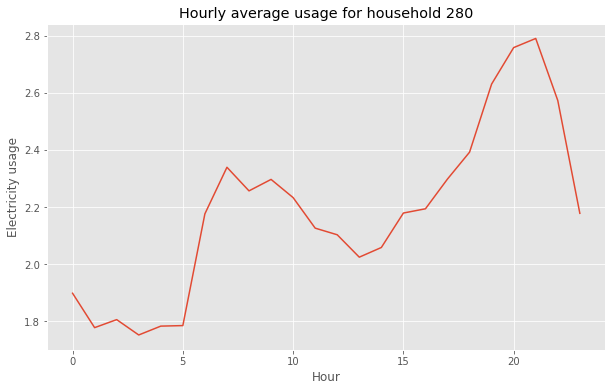

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity usage")
ax.set_title("Hourly average usage for household {}".format(dataid))
hours_df.use.groupby(lambda idx: idx.hour).mean().plot(ax=ax);
